# Real Estate Investment Analysis

# Scenario:

An investor is looking at a real estate asset and wants me to analyze the strength of the investment. I'm going to perform a thorough analysis over a ten-year period simulated multiple times to see how the asset performs consistently. The investor's portfolio is valued at $85M, all in index funds like "SPY"; this real estate asset will be a significant addition.

## Details:

* The investor requires a 15% return to make the investment.
* Projected revenues are usually provided by an agent from a property management company.
    - These are often based on comparables.
    - This will include a current occupancy rate of 87%, which varies in the real world..
    - Expenses will be weighted for simulation.
* There is _always_ a chance for a market downturn.

# Features:

* **Scalability**: Analyzing any number of units will be as simple as adjusting a single variable.
* **Discount Rate Calculation**: The rate at which future cash-flows will be discounted back to the present.
* **Cash Flow Analysis**: Discount cash-flow analysis based on provided projections.
* **Monte Carlo Simulation**: A simulation with randomized variables running over a large quantity of simulations to measure consistency of asset performance.
* **Randomly Varying Expenses**: Expenses will be randomly weighted within a given range to simulate real-life uncertainty.
* **Randomly Varying Occupancy**: Occupancy will vary randomly within a given range to simulate real-life uncertainty.
* **Random Chance for Market Crash**: There is always a chance things will go wrong. This chance will be factored into the simulations.

In [1844]:
# Importing libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Asset Details

The investor recieves some projections from the agent that they acquired from a friend at a property management company who manages a lot of units in the area.

* **Projected Income**: $40,000 - $60,000 a year per unit.

The investor has a required rate of return of 15%. I ask him if this factors in the risk-free-rate and a risk premium, or they would like me to make adjustments for that math; I explain I would be adjusting up. They want me to "work my magic", but they make it clear that 15% is the floor. The investor tells me they want me to assume 50% of income will go to expenses, and they agree to me randomizing it to simulate real-world uncertainty.

In [1845]:
# Declaring variables at the very beginning for total clarity in future calculations
# Come back here to make any adjustments and run program again.

investor_portfolio_value = 85000000

price = 19500000 # Price of investment : If using leverage, use the down payment and adjust expenses to account for mortgage

projection_lower = 40000
projection_upper = 60000

projected_income = np.random.uniform(projection_lower,projection_upper) # Projected income per unit randomly varies within given range

expense_factor = np.random.uniform(0.35, 0.75) # Percent of income to expenses varies between 35% and 75%

risk_free_rate = np.random.uniform(0.03,0.06) # An arbitrary range of 10-Year treasury yields (3%-6%) for this project

risk_premium = 0.05 # Let's pretend the investor requires 5% above the risk free rate

bottom_dollar = 0.15 # Must be 15% return to acquire asset

units = 126 # Number of units

estimated_income = projected_income * units

expense_adjusted_income = estimated_income - (estimated_income*expense_factor) # Use this in calculations

years = 10

chance_of_crash = 10 # 10% chance of negative market event

# The random seed is arbitrary and provides reproducablity; it does not affect anything in the analysis.
# If you want the results to change each time you run the notebook,
# just remove this line or code or comment it out.
# You can also change the seed to see a different reproducable set of results.
np.random.seed(23)

In [1846]:
# Calculating the Required Rate of Return
def RequiredRateOfReturn(rfr, rp, rrr):
    '''
    Calculates the required rate of return based on the risk-free-rate (usually 10-year treasury),
    the risk premium (required return above the risk-free-rate), and the investor's "bottom dollar"
    minimum requrired rate of return.

    If the required rate of return falls below this "bottom dollar" amount, the required rate of return
    will be set to the "bottom dollar" amount.

    Example: If the required rate of return comes out to be 13.12% and the investor requires 15%,
    this function will return 15% for the required rate of return.
    '''
    try:
        risk_free_rate = rfr
        risk_premium = rp
        required_return = rrr

        required_rate_of_return = risk_free_rate + risk_premium

        if required_rate_of_return < required_return:
            return required_return
        else:
            return required_rate_of_return
        
    except (ValueError,TypeError):
        return "Error: All inputs must be numbers."
    
############################################################################################################
# This separator is for readability
############################################################################################################
    
def NetPresentValue(units, expense_adjusted_income, required_rate_of_return, number_of_years):
    '''
    Calculates discounted cash-flow over a selected number of years, using income amount,
    and the investor's required rate of return.

    Parameters:
    expense_adjusted_income = projected income - expenses
    required_rate_of_return = risk free rate + risk premium
    number_of_years = the number of years the asset is intended to be held, or the time period in which the investor expects to receive their return

    Returns the net present value and the dcf list of values.
    '''
    try:
        income = expense_adjusted_income
        required_rate_of_return = required_rate_of_return
        number_of_years = number_of_years

        dcfs = []

        for year in range(1,number_of_years+1):
            dcf = income / (1+required_rate_of_return)**year
            dcfs.append(dcf)

        npv = np.sum(dcfs)

        return npv, dcfs

    
    except (ValueError,TypeError):
        return "Error: All values must be numbers."
    
############################################################################################################
# This separator is for readability
############################################################################################################

def WillItProduceTheReturn(net_present_value, price):

    print(f"Price: {price}")
    print(f"NPV: {net_present_value}")

    print(f"Net Present Value - Price = Determining Factor")

    determining_factor = net_present_value - price

    print(f"Determining Factor: {determining_factor}")

    if determining_factor < 0:
        print(f"Is the Determining Factor positive?")
        print(f"No.")
        print(f"It is likely the asset will not produce the required return.\nNegotiate lower price or pass.")
    else:
        print(f"Is the Determining Factor positive?")
        print(f"Yes")
        print(f"There's a good chance the asset will produce the required return.")

# Let's Conduct an Analysis

While we do have some complex logic going on, overall the project really is this simple. We can conduct a rigorous analysis in the current state of the project.

_You will have to uncomment the code and run the cell to see this example, and then comment the cell back out and rerun all cells_

In [1847]:
# Required Rate of Return
rrr = RequiredRateOfReturn(rfr=risk_free_rate,rp=risk_premium,rrr=bottom_dollar)

# Net Present Value
npv = NetPresentValue(units=units, expense_adjusted_income=expense_adjusted_income, required_rate_of_return=rrr, number_of_years=years)[0]

# Will it produce the return?
WillItProduceTheReturn(npv,price)

Price: 19500000
NPV: 10175156.99228173
Net Present Value - Price = Determining Factor
Determining Factor: -9324843.00771827
Is the Determining Factor positive?
No.
It is likely the asset will not produce the required return.
Negotiate lower price or pass.


## Obersvation of Results

If you run the notebook over and over again up to this point, you will see that determining factor is sometimes negative and sometimes positive. In general, if you have a good idea of the expenses and projections, you can do this once and if you find a positive number you are in good shape. In this scenario, we want to go deeper. This is where a monte carlo simulation comes into play.

# Monte Carlo Simulation

We have uncertainty in the income projection, expenses, and the risk free rate. Our risk free rate will always be the investor's required rate of return of 15% unless the math shows a greater number.

We are using a ten-year period. A monte carlo simulations allows us to analyze the consistency of the asset's performance by simulating this ten-year period over and over again, and observing how often it performs well or poorly.

A greater number of simulations will produce far more accurate results than a lesser number of simulations.

**_Warning_**: This is computationally _very_ intense. I am going to set a variable called "simulations" to the number of times we are going to simulate the ten-year period. If you do not have a powerful computer, you will want to set this variable to a lower value. These numbers are arbitrary, and this project is purely hypothetical. You are not making any sacrifice by keeping this value very low. It is perfectly fine to set the simulations to 10 or 20 so that you do not overload your PC. It is common for these simulations to be ran a million or more times, but simulations like that are done on very powerful computers. If you are on a normal everyday laptop, keep the simulations value low. I would recommend 10 or 20, but never exceed 100.

In [1848]:
simulations = 10000 # If you have a powerful computer, you can set it to 1,000 or 10,000 if you wish

results = []
crash = []
positive_results = []
negative_results = []

for i in range(1,simulations+1):
    # We need to reassign the variables from before so the random values
    # are recalculated each time

    # Random chance for market crash or some other negative scenario
    random_chance_for_market_crash = np.random.randint(1,100)

    # Logic to change expenses if there is a market crash or some other negative event
    if random_chance_for_market_crash <= chance_of_crash:
        projected_income = np.random.uniform(projection_lower,projection_upper) # Projected income per unit randomly varies within given range
        expense_factor = np.random.uniform(0.90, 1.25)
        print("There was a crash!")
        crash.append(1)
        estimated_income = projected_income * units
        expense_adjusted_income = estimated_income - (estimated_income*expense_factor) # Use this in calculations
    else:
        expense_factor = np.random.uniform(0.35, 0.75) # Percent of income to expenses varies between 35% and 75%
        projected_income = np.random.uniform(projection_lower,projection_upper) # Projected income per unit randomly varies within given range
        estimated_income = projected_income * units
        expense_adjusted_income = estimated_income - (estimated_income*expense_factor) # Use this in calculations
        crash.append(0)

    #############################################################################################################
    # This is for readability
    #############################################################################################################

    risk_free_rate = np.random.uniform(0.03,0.06) # An arbitrary range of 10-Year treasury yields (3%-6%) for this project

    # Required Rate of Return
    rrr = RequiredRateOfReturn(rfr=risk_free_rate,rp=risk_premium,rrr=bottom_dollar)

    # Net Present Value
    npv = NetPresentValue(units=units, expense_adjusted_income=expense_adjusted_income, required_rate_of_return=rrr, number_of_years=years)[0]

    #############################################################################################################
    # This is for readability
    #############################################################################################################

    determining_factor = npv - price

    results.append(determining_factor)

    if determining_factor <= 0:
        negative_results.append(determining_factor)
    else:
        positive_results.append(determining_factor)

    #############################################################################################################
    # This is for readability
    #############################################################################################################

    print(f"Simulation {i} complete...")

Simulation 1 complete...
Simulation 2 complete...
Simulation 3 complete...
Simulation 4 complete...
Simulation 5 complete...
Simulation 6 complete...
Simulation 7 complete...
Simulation 8 complete...
Simulation 9 complete...
Simulation 10 complete...
Simulation 11 complete...
Simulation 12 complete...
Simulation 13 complete...
Simulation 14 complete...
Simulation 15 complete...
Simulation 16 complete...
Simulation 17 complete...
Simulation 18 complete...
Simulation 19 complete...
Simulation 20 complete...
Simulation 21 complete...
There was a crash!
Simulation 22 complete...
Simulation 23 complete...
There was a crash!
Simulation 24 complete...
There was a crash!
Simulation 25 complete...
There was a crash!
Simulation 26 complete...
Simulation 27 complete...
Simulation 28 complete...
Simulation 29 complete...
There was a crash!
Simulation 30 complete...
Simulation 31 complete...
Simulation 32 complete...
Simulation 33 complete...
Simulation 34 complete...
Simulation 35 complete...
Simu

In [1849]:
results_count = len(results)
positive_results_count = len(positive_results)
negative_results_count = len(negative_results)

mean_of_results = np.mean(results)
median_of_results = np.median(results)

success_rate = positive_results_count / results_count
failure_rate = negative_results_count / results_count

crash_results = np.mean(crash)

print(f"Mean of Results: {mean_of_results:,.2f}")
print(f"Median of Results: {median_of_results:,.2f}")

print(f"Over {simulations} simulations, the asset produced postive results {success_rate*100}% of the time.")
print(f"Over {simulations} simulations, the asset produced negative results {failure_rate*100}% of the time.")
print()
print(f"SUCCESS RATE: {success_rate*100}%")
print()
print(f"Evaluation Metric:\nThe market crashed {crash_results*100}% of the time.")
print(f"This means {crash_results*100}% of the years contained a negative market event.")
print(f"If that seems realistic to you, this is a good model.")

Mean of Results: -6,850,853.59
Median of Results: -6,078,544.59
Over 10000 simulations, the asset produced postive results 10.780000000000001% of the time.
Over 10000 simulations, the asset produced negative results 89.22% of the time.

SUCCESS RATE: 10.780000000000001%

Evaluation Metric:
The market crashed 9.92% of the time.
This means 9.92% of the years contained a negative market event.
If that seems realistic to you, this is a good model.


# Visualizations

Now that we have ran our simulation, we can take a look at some visualizations of our results. This is one of the simplest parts. We need a column chart and a histogram.

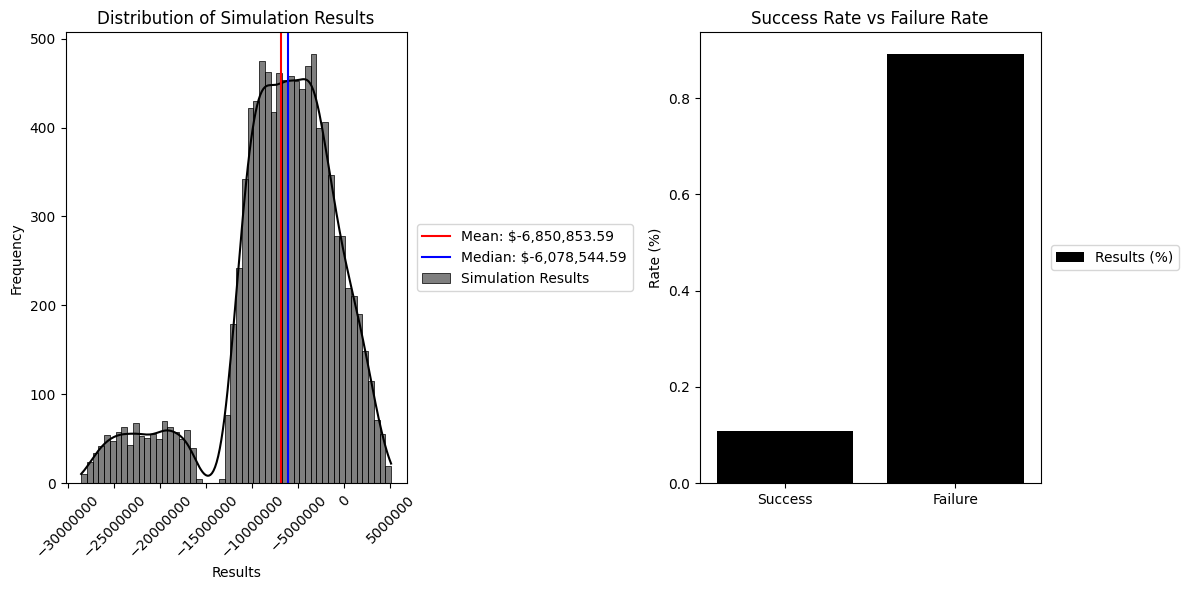

In [1850]:
labels = ["Success", "Failure"]
values = [success_rate, failure_rate]

fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.histplot(results,ax=axs[0],kde=True, color='black', label="Simulation Results")
axs[0].axvline(mean_of_results,color='red', label=f"Mean: ${mean_of_results:,.2f}")
axs[0].axvline(median_of_results,color='blue', label=f"Median: ${median_of_results:,.2f}")
axs[0].ticklabel_format(style='plain', axis='x')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_title("Distribution of Simulation Results")
axs[0].set_xlabel("Results")
axs[0].set_ylabel("Frequency")
axs[0].legend(loc='center left', bbox_to_anchor=(1.01,0.5))

sns.barplot(x=labels,y=values,ax=axs[1], color='black', label="Results (%)")
axs[1].set_title("Success Rate vs Failure Rate")
axs[1].set_ylabel("Rate (%)")
axs[1].legend(loc='center left', bbox_to_anchor=(1.01,0.5))

plt.tight_layout()

# Further Analysis

Now, let's analyze the incomes without discounting to compare to market returns.

_Note: This is a theoretical concept for sake of comparing a non-security with a security._

In [1851]:
# Random incomes withing projected range
cash_flows = np.random.uniform(projection_lower*units,projection_upper*units,10)
caps = []

for i in range(1,len(cash_flows)):
    cap = cash_flows[i] / price
    caps.append(cap)

len(caps)


9

In [1852]:
# YoY changes in cap rate
changes = []

for i in range(1,len(caps)):
    change = (caps[i] - caps[i-1]) / caps[i-1]
    changes.append(change)

changes

[-0.014541290122979245,
 0.019838845817781812,
 0.3439851069160951,
 -0.15115455006173123,
 0.2010931363635313,
 -0.18128594731845235,
 0.13387295749503042,
 0.0827141827447329]

## Analyzing the asset relative to the S&P 500

Now that I have the incomes from the asset converted to cap rates and then cap rates converted to year over year returns, I can bring in data for SPY, find the year over year returns, and perform a portfolio analysis.

### Gathering SPY data

In [1853]:
# Getting ETF data
spy = "SPY"
data = yf.download(spy,start="2015-10-22",end="2023-10-22") # There will only be 8 periods for our asset due to conversions

df = pd.DataFrame({
    'SPY': data['Close']
})

df.head()

[*********************100%%**********************]  1 of 1 completed


,SPY
Date,
2015-10-22,205.259995
2015-10-23,207.509995
2015-10-26,207.000000
2015-10-27,206.600006
2015-10-28,208.949997


In [1854]:
# Calculating year over year changes
annual_closing_price = df['SPY'].resample('Y').last()

market_returns = annual_closing_price.pct_change()

market_returns

Date
2015-12-31         NaN
2016-12-31    0.096434
2017-12-31    0.193844
2018-12-31   -0.063479
2019-12-31    0.287852
2020-12-31    0.161623
2021-12-31    0.270354
2022-12-31   -0.194816
2023-12-31    0.101352
Freq: A-DEC, Name: SPY, dtype: float64

In [1855]:
# Some data will be lost to all these conversions
# This is expected
print(len(changes))
print(len(market_returns))

8
9


In [1856]:
# Creating a portfolio data frame
portfolio = pd.DataFrame({
    'SPY': market_returns.iloc[1:], # Starting at index 1 to drop the nan value
    'Our Asset': changes
})

portfolio.head()

,SPY,Our Asset
Date,,
2016-12-31,0.096434,-0.014541
2017-12-31,0.193844,0.019839
2018-12-31,-0.063479,0.343985
2019-12-31,0.287852,-0.151155
2020-12-31,0.161623,0.201093


In [1857]:
# Resetting index so I can drop the Date column
portfolio.reset_index(inplace=True)
portfolio.drop(columns='Date',inplace=True)

portfolio.head()

,SPY,Our Asset
0,0.096434,-0.014541
1,0.193844,0.019839
2,-0.063479,0.343985
3,0.287852,-0.151155
4,0.161623,0.201093


### Calculating Alpha

In [1858]:
beta = np.cov(portfolio['Our Asset'],portfolio['SPY'])[0,1] / np.var(portfolio['SPY'])

alpha = np.mean(portfolio['Our Asset'] - risk_free_rate + (beta*(np.mean(portfolio['SPY']))-risk_free_rate))

print(f"Beta: {beta}")
print(f"Alpha: {alpha}")

Beta: -0.8618753844924857
Alpha: -0.10416513963170286


### Observation

* A $beta$ value of -0.86 means we could have a negative correlation with the market.
* An $alpha$ value of -0.10 means we are slightly underperforming relative to the market.

The next step is to check for correaltion.

In [1859]:
# Calculating correlation coefficient
portfolio.corr()

,SPY,Our Asset
SPY,1.000000,-0.707301
Our Asset,-0.707301,1.000000


### Observation

I was right; there is a lightly moderate negative correlation. This could be a good thing for a portfolio.

## Portfolio Variance

Let's analyze the affect this asset will have on the portfolio.

In [1860]:
# Calculating weights
total_value = investor_portfolio_value + price # Price of this asset

asset_weight = price / total_value
index_weight = investor_portfolio_value / total_value

weights = np.array([asset_weight, index_weight])

print((asset_weight, index_weight))

print(asset_weight + index_weight) # Should equal 1 exactly

(0.18660287081339713, 0.8133971291866029)
1.0


In [1861]:
# Portfolio parameters
index_std = portfolio['SPY'].std()
asset_std = portfolio['Our Asset'].std()

cov_matrix = np.cov(portfolio, rowvar=False)

print(f"Index Standard Deviation: {index_std:.4f}")
print(f"Asset Standard Deviation: {asset_std:.4f}")

portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

portfolio_standard_deviation = np.sqrt(portfolio_variance)

print(f"Portfolio Standard Deviation: {portfolio_standard_deviation:.4f}")

Index Standard Deviation: 0.1648
Asset Standard Deviation: 0.1758
Portfolio Standard Deviation: 0.1231


### Observation

* Index Standard Deviation: 0.1648 or 16.48%
* Asset Standard Deviation: 0.1758 or 17.58%
* Portfolio Standard Deviation: 0.1231 or 12.31%

The standard deviation of the portfolio will decrease, reducing overall volaitlity of the value of the investor's holdings.

# Expected Return:

A weighted average of the returns to find the expected return of the portfolio.

In [1862]:
# Expected return
expected_return_portfolio = (asset_weight * portfolio['Our Asset'].mean())+(index_weight * portfolio['SPY'].mean())

print(f"Expected Return of Asset: {portfolio['Our Asset'].mean()*100:.4f}%")
print(f"Expected Return of Market: {portfolio['SPY'].mean()*100:.4f}%")

print(f"Expected Return of Portfolio: {expected_return_portfolio*100:.4f}%")

Expected Return of Asset: 5.4315%
Expected Return of Market: 10.6646%
Expected Return of Portfolio: 9.6881%


# Return on Risk

If you see a return on risk of 1.25, that means for every 1 unit of risk, you can expect 1.25 units of return.

You wouldn't want to trade down by having 1 unit of risk for 0.5 units of return. The trade-off doesn't make sense.

You _would_ want to trade up by having 1 unit of risk for 1.25 units of return as you stand to gain more than you are risking to lose.

In [1863]:
# Return on risk of the asset

return_on_risk = portfolio['Our Asset'].mean() / asset_std

print(f"Return on Risk: {return_on_risk}")

Return on Risk: 0.3090290459450973


In [1864]:
# Return on risk of the market

return_on_risk = portfolio['SPY'].mean() / index_std

print(f"Return on Risk: {return_on_risk}")

Return on Risk: 0.6469454069767795


In [1865]:
# Return on risk of the portfolio

return_on_risk = expected_return_portfolio / portfolio_standard_deviation

print(f"Return on Risk: {return_on_risk}")

Return on Risk: 0.7867396221025277


## Return on risk findings

* The return on risk of the asset is 0.3090290459450973
* The return on risk of the market (SPY) is 0.6469454069767795
* The return on risk of the portfolio is 0.7867396221025277

***

While a return on risk of 0.7867 is below a standard of 1, adding the real estate asset to the portfolio does show an increase in return for each unit of risk.

# Conclusion

## Is the asset a good buy?

The real asset is likely not going to make the return the investor is seeking. I would recommend against paying a lower price for the asset where the chance of success is high.

## The return/risk trade-off

While the asset alone is not providing a good return/risk trade-off, it does make the portfolio as a whole better. The real estate asset could serve the purpose of diversification; however, this does not make it a good purchase. Diversifying should be done with a few _good_ assets.

## The expected return of the portfolio is lower with the real estate asset in it

Following up on the return/risk trade-off is the fact that the expected value of the portfolio does decrease with the real estate asset in it. This is to be expected as lower volatility as we saw with the portfolio standard deviation calculation will mean lower returns also. The idea is the higher return/risk trade-off the more return you are getting for the risk you are taking. As I stated before, the asset in the portfolio does increase the return on risk.

## My final input

I say do not buy the asset. By itself, it is consistently a bad purchase as this price. I have provided the investor with a few parameters to help them think it over since it does help hedge against volatility, but this deal definitely needs to be negotiated further or skipped over at this price in my opinion.